In [1]:
from config import PREFERRED_DEVICE, CPU, GPU, IMG_DIR, LEGEND_PATH, CHECKPOINTS_DIR
from models import LittleModel
from data_loading import Dataset, dataloader_factory
from transformations import cnn_preprocess
from training import train, evaluate

import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pathlib import Path

print(f"Using device: {PREFERRED_DEVICE}")

# Little Model Example

In [ ]:
BATCH_SIZE = 32

# Data setup
legend = pd.read_csv(LEGEND_PATH)
dataset = Dataset(legend, IMG_DIR, transform=cnn_preprocess)
train_data, test_data = dataset.split([0.8, 0.2])

train_loader = dataloader_factory(train_data, batch_size=BATCH_SIZE)
test_loader = dataloader_factory(test_data, batch_size=BATCH_SIZE)

# Model setup
model = LittleModel()
loss = torch.nn.CrossEntropyLoss()
model.apply_optimizer(torch.optim.Adam, lr=0.0002)

# Training
losses = train(model, train_loader, test_loader, loss, epochs=5)

# Save the model
model.save(Path(CHECKPOINTS_DIR, "little_test.pt"))

Training on device cuda:0
Epoch 1 of 1
Batch 0 of 341: Training Loss = 5.378418922424316; Validation Loss = 26.091307109052483
Batch 100 of 341: Training Loss = 2.3862099647521973; Validation Loss = 2.344664356925271
Batch 200 of 341: Training Loss = 1.3908060789108276; Validation Loss = 0.9948693053288893
Batch 300 of 341: Training Loss = 0.8691447377204895; Validation Loss = 0.8186609640040181
Epoch 1 took 63.89 seconds
--------------------------------------------------------------------------------


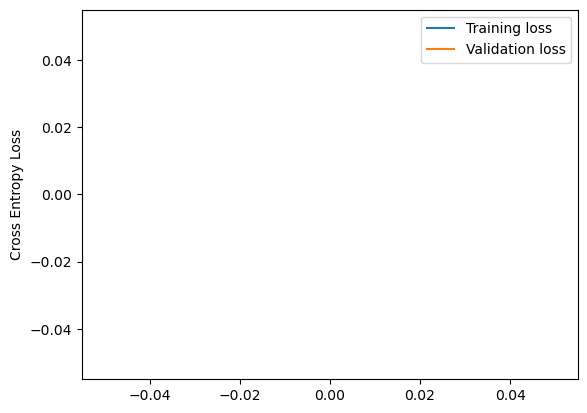

In [ ]:
# Remove the first loss value, as it is usually an outlier
training_loss = losses["train"].mean(axis=1)[1:]
validation_loss = losses["val"].mean(axis=1)[1:]

plt.plot(training_loss, label="Training loss")
plt.plot(validation_loss, label="Validation loss")
plt.ylabel("Cross Entropy Loss")

plt.legend()
plt.show()